<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/WIDE%20and%20DEEP-NeuralNetworkModels/WnD(multi_in_out)bostonhousing_pricepredict(regularized).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Usage of Wide and Deep neural network architecture to build a tiny complex model using Functional API**

 This Architecture makes it possible for the Neural Network to learn both deep patterns and simple rules.


*   **Boston Housing dataset**
*   **Wide and Deep model**
*   **Funtional API**
*   **Multi-input and Multi-output**
*   **Overfitted deliberately and regularized(L2 and Dropout)**
*   **Normalised using StandardScaler**

In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# fetching the boston-house-pricing dataset from Keras' datasets 

(train_data_full, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

# splitting into train(80% of train_data_full) and validation sets(20% of train_data_full)

train_data, val_data, train_targets, val_targets = train_test_split(train_data_full, train_targets, test_size=0.2)

57344/57026 [==============================] - 0s 0us/step


In [3]:
# checking all the shapes of the produced partitions

print(train_data.shape,"\n", test_data.shape,"\n", val_data.shape,"\n", train_targets.shape,"\n", test_targets.shape,"\n", val_targets.shape,"\n")

(323, 13) 
 (102, 13) 
 (81, 13) 
 (323,) 
 (102,) 
 (81,) 



In [4]:
#preprocessing the datasets using StandardScaler

sc = StandardScaler()
sc.fit(train_data)
train_data_std = sc.transform(train_data)
test_data_std = sc.transform(test_data)
val_data_std = sc.transform(val_data)

**This dataset provides the median value of houses based on the 13 input features. We'll be passing first 5 features into the WIDE path and the rest features into the DEEP path.**

In [5]:
# hence further splitting the train, validation and test sets as mentioned above

X_trainA, X_trainB = train_data[:, :5], train_data[:, 5:]
X_valA, X_valB = val_data[:, :5], val_data[:, 5:]
X_testA, X_testB = test_data[:, :5], test_data[:, 5:]


**Model is overfitted deliberately to ensure proper usage of L2 regularizers and Dropouts too**

In [6]:
# THE MODEL

inputA = keras.layers.Input(shape=[5], name="wide_input") # WIDE path
inputB = keras.layers.Input(shape=[8], name="deep_input") # DEEP path

hid1 = keras.layers.Dense(30, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(inputB) # L2 regularizaton
keras.layers.Dropout(0.008) # Dropout Regularization
hid2 = keras.layers.Dense(30, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(hid1)
keras.layers.Dropout(0.008)

concat = keras.layers.concatenate([inputA, hid2]) # to concatenate inputA with the output of the second layer

#output snippet
output = keras.layers.Dense(1, name="main_output", kernel_regularizer=keras.regularizers.l2(0.01))(concat)
auxi_output = keras.layers.Dense(1, name="aux_output", kernel_regularizer=keras.regularizers.l2(0.01))(hid2)

model = keras.Model(inputs=[inputA, inputB], outputs=[output, auxi_output])

# NOTE !!!!
# Multiple put is mostly used depending on the task. for example, if you wanna train both classification and regression model on the same data or simmilary
# we can have multiple independent tast based on the same data.

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [8]:
#compiling the model

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="rmsprop", metrics=["mape"]) #0.9 weight for the main output-loss and 0.1 for the auxiliary output-loss

In [9]:
#training the model

history = model.fit([X_trainA, X_trainB], [train_targets, train_targets], epochs=500, validation_data=([X_valA, X_valB], [val_targets, val_targets]))

Epoch 1/500
11/11 [==============================] - 0s 25ms/step - loss: 946.4173 - main_output_loss: 761.9304 - aux_output_loss: 2602.1501 - main_output_mape: 115.6513 - aux_output_mape: 249.3980 - val_loss: 179.3227 - val_main_output_loss: 106.1038 - val_aux_output_loss: 833.7723 - val_main_output_mape: 34.9762 - val_aux_output_mape: 140.2773
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 121.0854 - main_output_loss: 96.8806 - aux_output_loss: 334.4748 - main_output_mape: 35.6778 - aux_output_mape: 69.9919 - val_loss: 105.5103 - val_main_output_loss: 94.4380 - val_aux_output_loss: 200.7942 - val_main_output_mape: 28.7196 - val_aux_output_mape: 54.0533
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 103.5383 - main_output_loss: 100.7534 - aux_output_loss: 124.2919 - main_output_mape: 36.7547 - aux_output_mape: 41.5653 - val_loss: 112.9889 - val_main_output_loss: 108.5359 - val_aux_output_loss: 148.8312 - val_main_output_mape: 32.7568

In [10]:
 # model evaluation
 
 model.evaluate([X_testA, X_testB], [test_targets, test_targets])

4/4 [==============================] - 0s 2ms/step - loss: 28.2971 - main_output_loss: 27.8091 - aux_output_loss: 28.2302 - main_output_mape: 18.2423 - aux_output_mape: 17.4741


[28.297054290771484,
 27.809125900268555,
 28.230161666870117,
 18.2423095703125,
 17.47406768798828]

In [11]:
# recording predictions

preds_main, preds_auxi = model.predict([X_testA, X_testB])

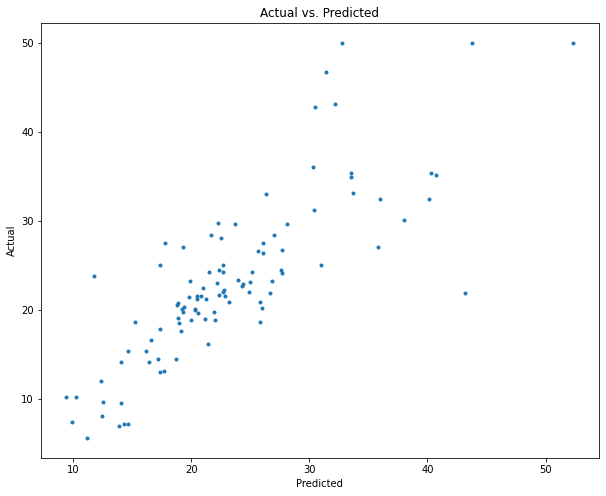

In [12]:
# preds_main

plt.figure(figsize=(10, 8))
plt.scatter(preds_main, test_targets, marker='.')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

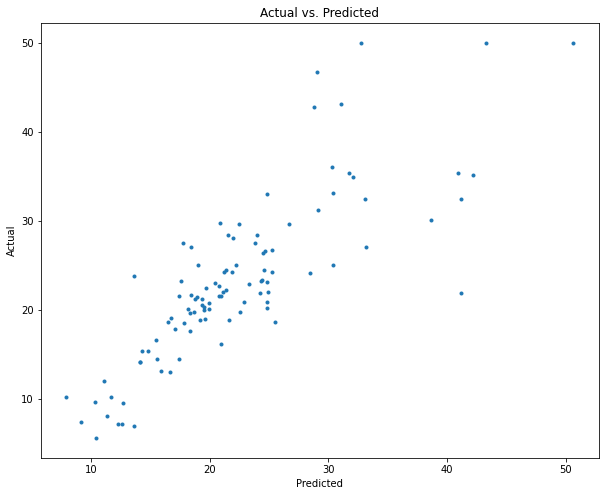

In [13]:
# preds_auxi

plt.figure(figsize=(10, 8))
plt.scatter(preds_auxi, test_targets, marker='.')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

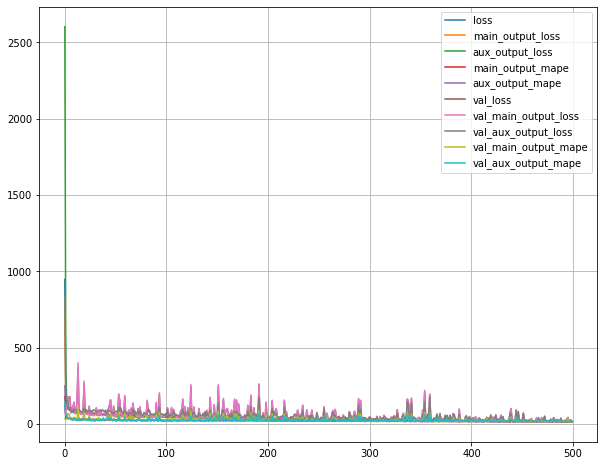

In [14]:
# loss graph
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca()

In [15]:
print(test_targets[:10])


[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


In [16]:
print(preds_main[:10],"\n\nmain predictions\n\n", preds_auxi[:10], "\n\nauxiliary predictions")


[[14.297901]
 [20.00375 ]
 [21.181654]
 [35.83576 ]
 [22.743946]
 [22.336107]
 [30.415377]
 [24.409615]
 [18.767729]
 [19.941551]] 

main predictions

 [[12.230735]
 [19.138962]
 [19.605345]
 [33.193794]
 [21.409971]
 [21.351381]
 [29.097614]
 [23.31344 ]
 [19.350885]
 [17.571363]] 

auxiliary predictions
